In [3]:
import sys
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
hbarc_GeVfm = 0.1973269804

def lplot(taus):
    h = 0.1
    rks = [2,4]
    dpi=300
    c = ['red', 'blue', 'green', 'magenta', 'orange', 'black']  # color code  for analytical solution
    dc = ['darkred', 'darkblue', 'darkgreen', 'darkmagenta',
          'darkorange', 'black']  # corresponding color code for CCAKE solution as well as tau labels
    fig, ax = plt.subplots(2,2,figsize=np.array([15,10]), sharex=True, gridspec_kw={'wspace':.5})
    for i,t in enumerate(taus):
        # reading in and plotting analytical solution
        inp_path_a = os.path.join('long/Analytical','long_tau_'+t+'.dat')
        col_names_a=['x', 'y', 'eta', 'eps', 'rhoB', 'rhoS', 'rhoQ', 'ux', 'uy', 'ueta', 'Bulk', 'Pixx', 'Pixy', 'Pixeta', 'Piyy', 'Piyeta', 'Pietaeta']
        dfa = pd.read_table(inp_path_a, names=col_names_a, sep=" ", header=0, index_col = False)
        dfa['p'] = dfa['eps']/3
        ax[0][0].plot(dfa['eta'],dfa['eps'],label='Analytical' if t == taus[0] else "",color=c[i])
        ax[0][1].plot(dfa['eta'],dfa['eps'],label='Analytical' if t == taus[0] else "",color=c[i])
        ax[1][0].plot(dfa['eta'],dfa['ueta'],label='Analytical' if t == taus[0] else "",color=c[i])
        ax[1][1].plot(dfa['eta'],dfa['ueta'],label='Analytical' if t == taus[0] else "",color=c[i])
        ax[0][0].legend()
        ax[0][1].legend()
        ax[1][0].legend()
        ax[1][1].legend()
        
        # reading in and plotting CCAKE solution
        dt=.001
        col_names_s=['id','tau', 'eta', 'p', 'T', 'muB', 'muS', 'muQ', 'eps', 'rhoB',
                   'rhoS', 'rhoQ', 's', 'smoothed_s', 'specific_s', 'sigma',
                   'norm_spec_s', 'stauRelax', 'bigtheta', "??", "??2",
                   'shv00', 'shv11', 'shv22', 'hydro_shv12', 't^2 shv33', 
                   'v_eta', 'gamma', 'freeze', 'eos_name']
        idx = int(np.round((float(t)-1)/dt)/100) # calculating the system_state id number based on dt
        # Path needs to be edited for the respective solutions
        inp_path_s1 = os.path.join(f'long/Sim/h_0.1/rk4',f'system_state_{idx}.dat')
        inp_path_s2 = os.path.join(f'long/Sim/h_0.1/rk2',f'system_state_{idx}.dat')
        dfs1 = pd.read_table(inp_path_s1,
                           names=col_names_s,sep=' ',header=1)
        dfs2 = pd.read_table(inp_path_s2,
                           names=col_names_s,sep=' ',header=1)
        dfs1['ueta'] = dfs1.loc[:,'v_eta']*dfs1.loc[:,'gamma']
        dfs2['ueta'] = dfs2.loc[:,'v_eta']*dfs2.loc[:,'gamma']
        ax[0][0].plot(dfs1['eta'],dfs1['eps']/1000,label='CCAKE' if t == taus[0] else "",color=dc[i],ls='--')
        ax[0][1].plot(dfs2['eta'],dfs2['eps']/1000,label='CCAKE' if t == taus[0] else "",color=dc[i],ls='--')
        ax[1][0].plot(dfs1['eta'],dfs1['ueta'],label='CCAKE' if t == taus[0] else "",color=dc[i],ls='--')
        ax[1][1].plot(dfs2['eta'],dfs2['ueta'],label='CCAKE' if t == taus[0] else "",color=dc[i],ls='--')
        ax[0][0].text(dfa['eta'].iloc[150], dfa['eps'].iloc[1100], rf'$\tau$ = {t}', color=dc[i], va='center')
        ax[0][1].text(dfa['eta'].iloc[150], dfa['eps'].iloc[1100], rf'$\tau$ = {t}', color=dc[i], va='center')
        ax[1][0].text(dfa['eta'].iloc[-1], dfa['ueta'].iloc[-1]*1.2, rf'$\tau$ = {t}', color=dc[i], va='center')
        ax[1][1].text(dfa['eta'].iloc[-1], dfa['ueta'].iloc[-1]*1.2, rf'$\tau$ = {t}', color=dc[i], va='center')

        
        ax[0][0].legend()
        ax[0][1].legend()
        ax[1][0].legend()
        ax[1][1].legend()

        ax[0][0].set_ylabel(r"$\epsilon$")
        ax[0][1].set_ylabel(r"$\epsilon$")
        ax[0][0].set_xlabel(r"$\eta$")
        ax[0][1].set_xlabel(r"$\eta$")
        ax[0][0].set_title("RK 4")
        ax[0][1].set_title("RK 2")

        ax[1][0].set_ylabel(r"$\epsilon$")
        ax[1][1].set_ylabel(r"$\epsilon$")
        ax[1][0].set_xlabel(r"$u_{\eta}$")
        ax[1][1].set_xlabel(r"$u_{\eta}$")


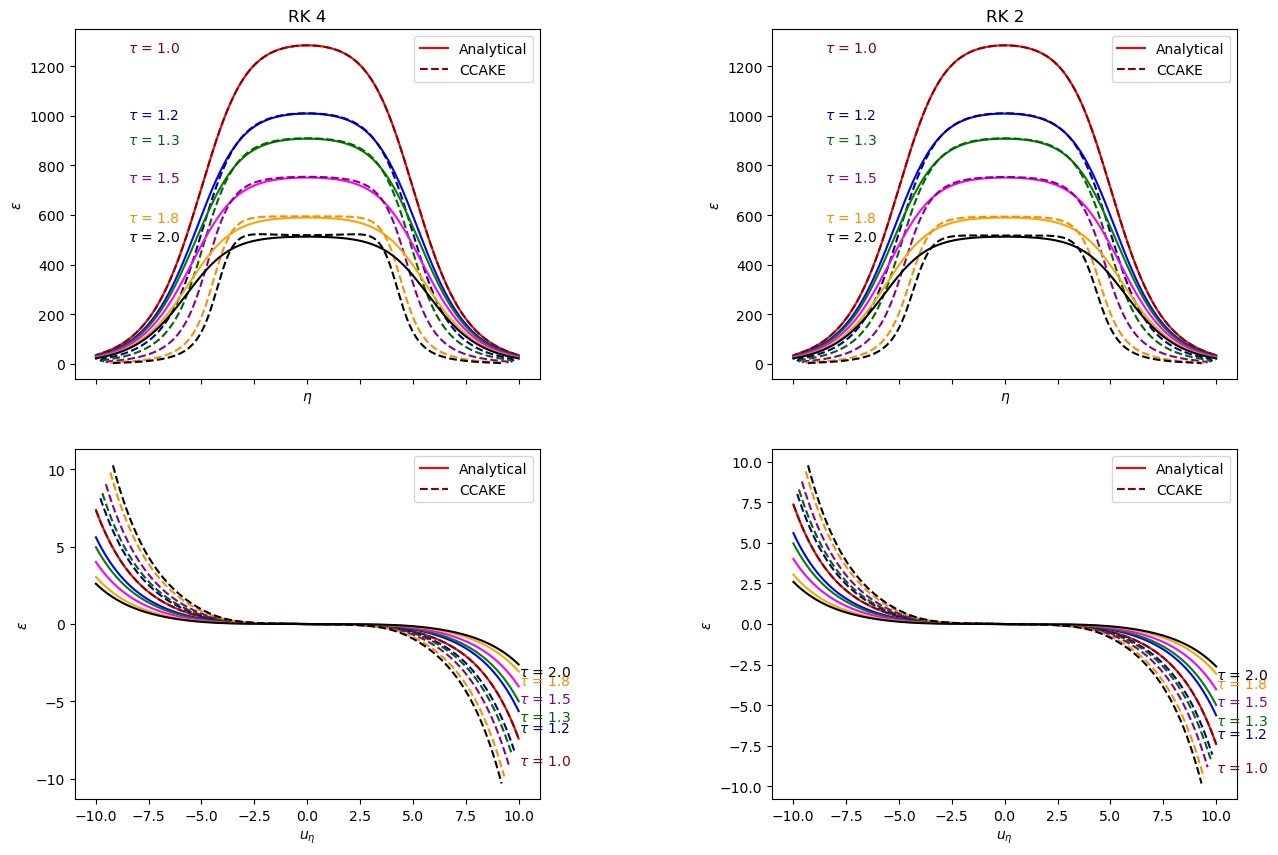

In [5]:
lplot(['1.0', '1.2', '1.3', '1.5', '1.8','2.0'])